In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
import warnings

In [2]:
df=pd.read_csv("../Assignment 13-KNN/Zoo.csv")
df

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,wallaby,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1,1
97,wasp,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0,6
98,wolf,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
99,worm,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,7


In [3]:
df.columns

Index(['animal name', 'hair', 'feathers', 'eggs', 'milk', 'airborne',
       'aquatic', 'predator', 'toothed', 'backbone', 'breathes', 'venomous',
       'fins', 'legs', 'tail', 'domestic', 'catsize', 'type'],
      dtype='object')

In [4]:
df.drop(['animal name'],axis=1,inplace=True)

In [5]:
pd.isnull(df).value_counts()

hair   feathers  eggs   milk   airborne  aquatic  predator  toothed  backbone  breathes  venomous  fins   legs   tail   domestic  catsize  type 
False  False     False  False  False     False    False     False    False     False     False     False  False  False  False     False    False    101
dtype: int64

In [6]:
x=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [7]:
x

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize
0,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1
1,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1
2,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0
3,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1
4,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1
97,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0
98,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1
99,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0


In [8]:
y

0      1
1      1
2      4
3      1
4      1
      ..
96     1
97     6
98     1
99     7
100    2
Name: type, Length: 101, dtype: int64

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [11]:
model=KNeighborsClassifier(n_neighbors=12)
model.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=12)

In [13]:
y_pred = model.predict(X_test)

In [14]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[11  0  0  1  0  0]
 [ 0  2  0  0  0  0]
 [ 0  0  0  1  0  0]
 [ 0  0  0  2  0  0]
 [ 0  0  0  0  3  0]
 [ 0  0  0  1  0  0]]
              precision    recall  f1-score   support

           1       1.00      0.92      0.96        12
           2       1.00      1.00      1.00         2
           3       0.00      0.00      0.00         1
           4       0.40      1.00      0.57         2
           6       1.00      1.00      1.00         3
           7       0.00      0.00      0.00         1

    accuracy                           0.86        21
   macro avg       0.57      0.65      0.59        21
weighted avg       0.85      0.86      0.84        21



C:\Users\USER\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\USER\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\USER\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


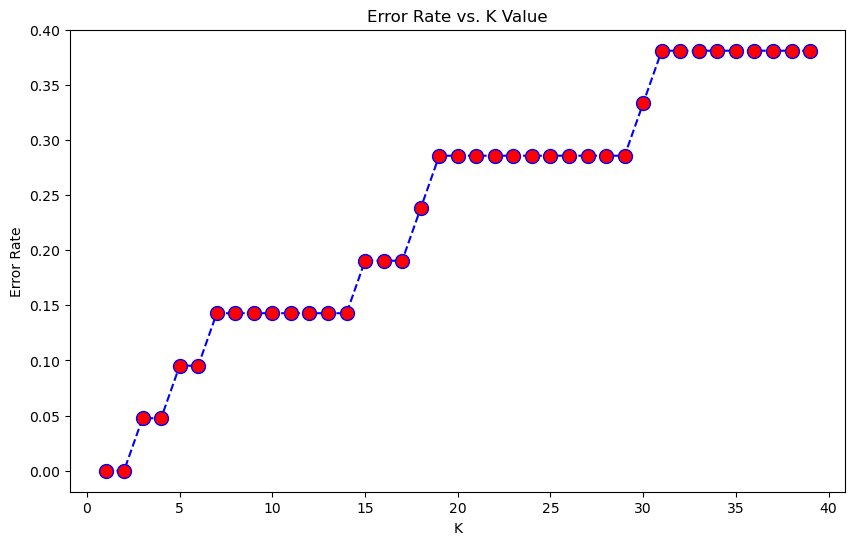

In [15]:
error_rates = []

for i in range(1, 40):  # Example: checking k from 1 to 39
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error_rates.append(np.mean(pred_i != y_test))

# Plotting error rates
plt.figure(figsize=(10, 6))
plt.plot(range(1, 40), error_rates, color='blue', linestyle='dashed', marker='o', markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
plt.show()


In [16]:
kfold=KFold(n_splits=10)
results=cross_val_score(model,x,y,cv=kfold)

In [17]:
results

array([1. , 0.6, 0.8, 1. , 0.9, 0.8, 0.8, 0.5, 0.6, 0.8])

In [18]:
print(results.mean())

0.78


In [19]:
warnings.filterwarnings('ignore')
k_range=range(1,40)
k_scores=[]
for k in k_range:
  knn=KNeighborsClassifier(n_neighbors=k)
  scores=cross_val_score(knn,x,y,cv=10,scoring='accuracy')
  k_scores.append(scores.mean())
#pd.Series(k_scores).sort_values(ascending=False)

In [20]:
k_range

range(1, 40)

In [21]:
k_scores

[0.9800000000000001,
 0.9400000000000001,
 0.95,
 0.9200000000000002,
 0.8809090909090909,
 0.8709090909090909,
 0.8418181818181818,
 0.8118181818181819,
 0.7818181818181819,
 0.7818181818181819,
 0.7818181818181819,
 0.7818181818181819,
 0.7818181818181819,
 0.7818181818181819,
 0.7818181818181819,
 0.7818181818181819,
 0.7818181818181819,
 0.7818181818181819,
 0.7818181818181819,
 0.7818181818181819,
 0.7818181818181819,
 0.7818181818181819,
 0.7718181818181818,
 0.7418181818181818,
 0.7218181818181818,
 0.7027272727272726,
 0.7027272727272726,
 0.7027272727272726,
 0.7027272727272726,
 0.7027272727272726,
 0.7027272727272726,
 0.6927272727272726,
 0.6436363636363637,
 0.5936363636363635,
 0.5936363636363635,
 0.5736363636363636,
 0.5736363636363636,
 0.5736363636363636,
 0.5736363636363636]

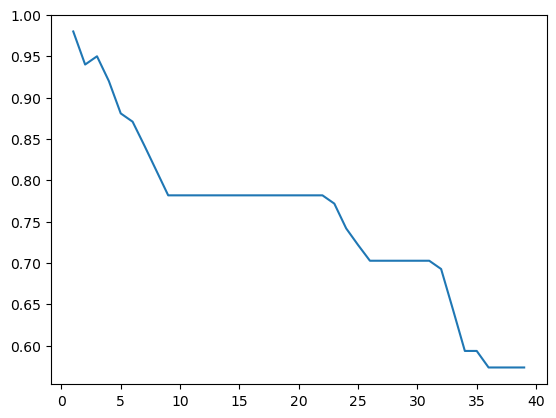

In [22]:
plt.plot(k_range,k_scores)

In [24]:
df

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1,1
97,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0,6
98,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
99,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,7


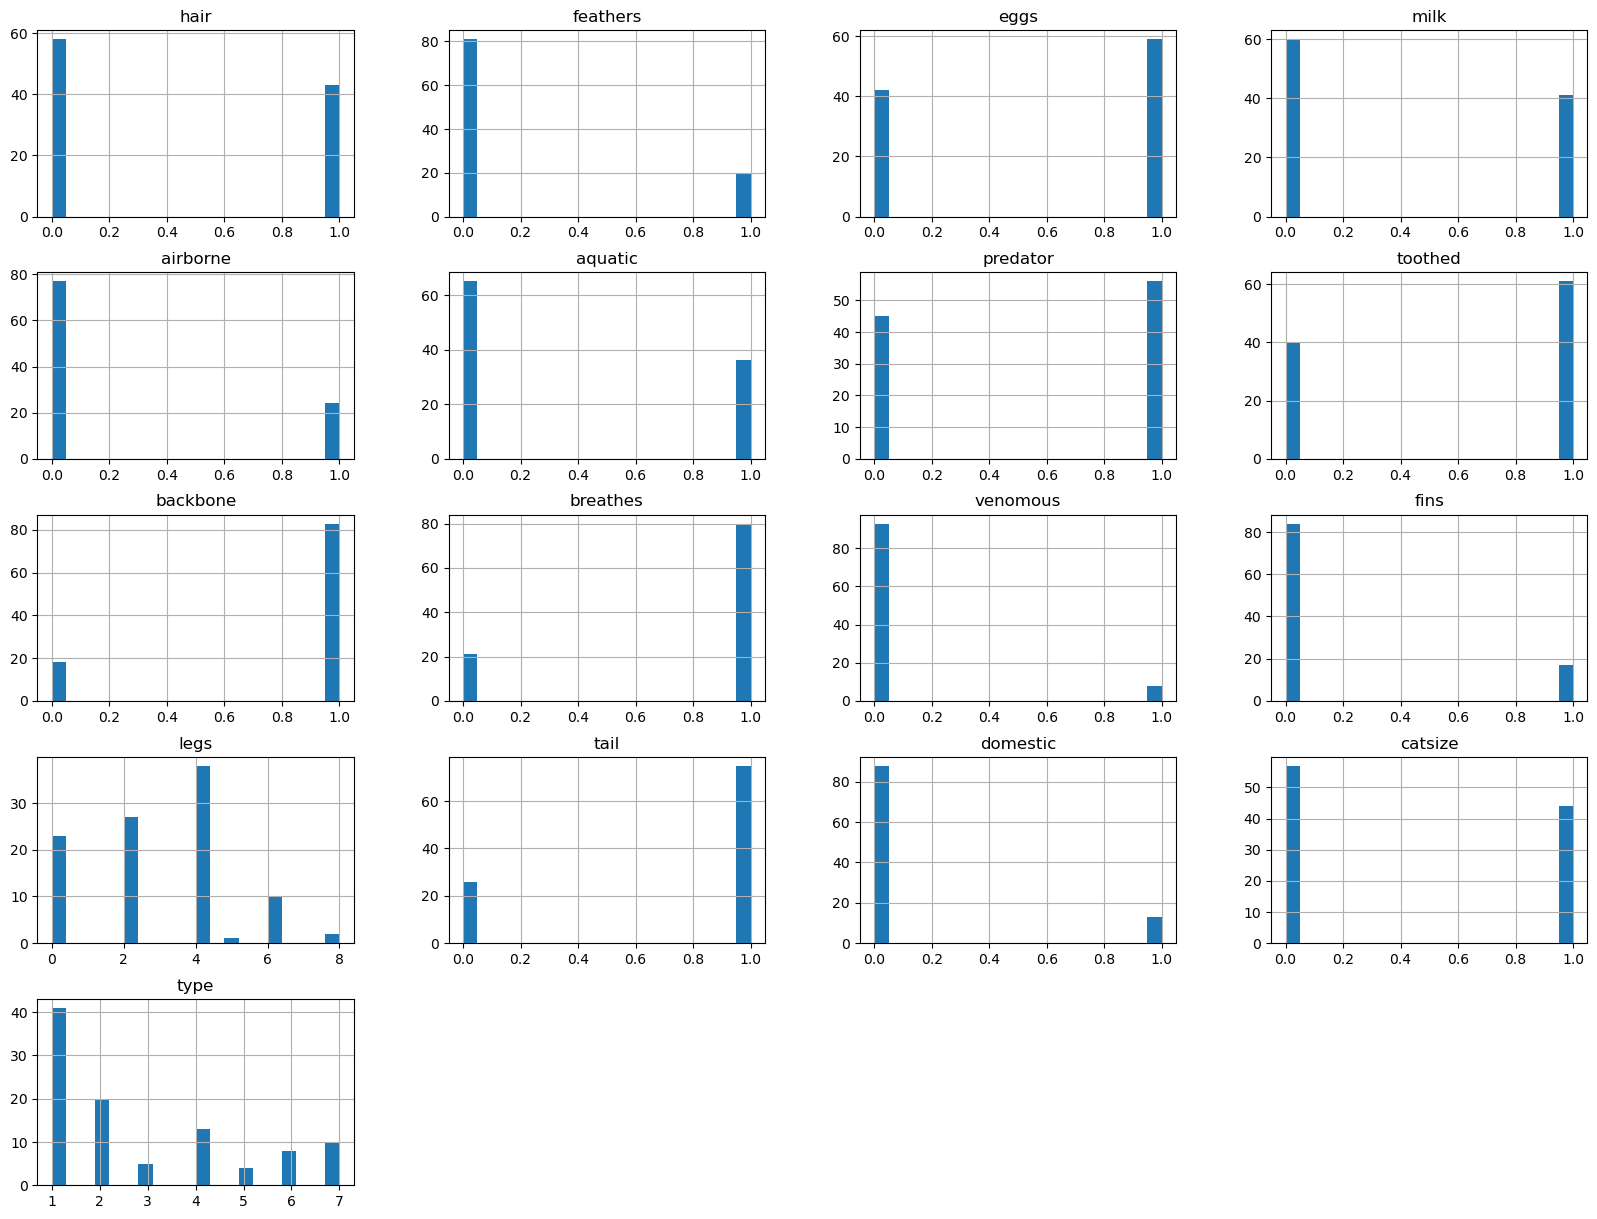

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df is your DataFrame
df.hist(bins=20, figsize=(20, 15))
plt.show()

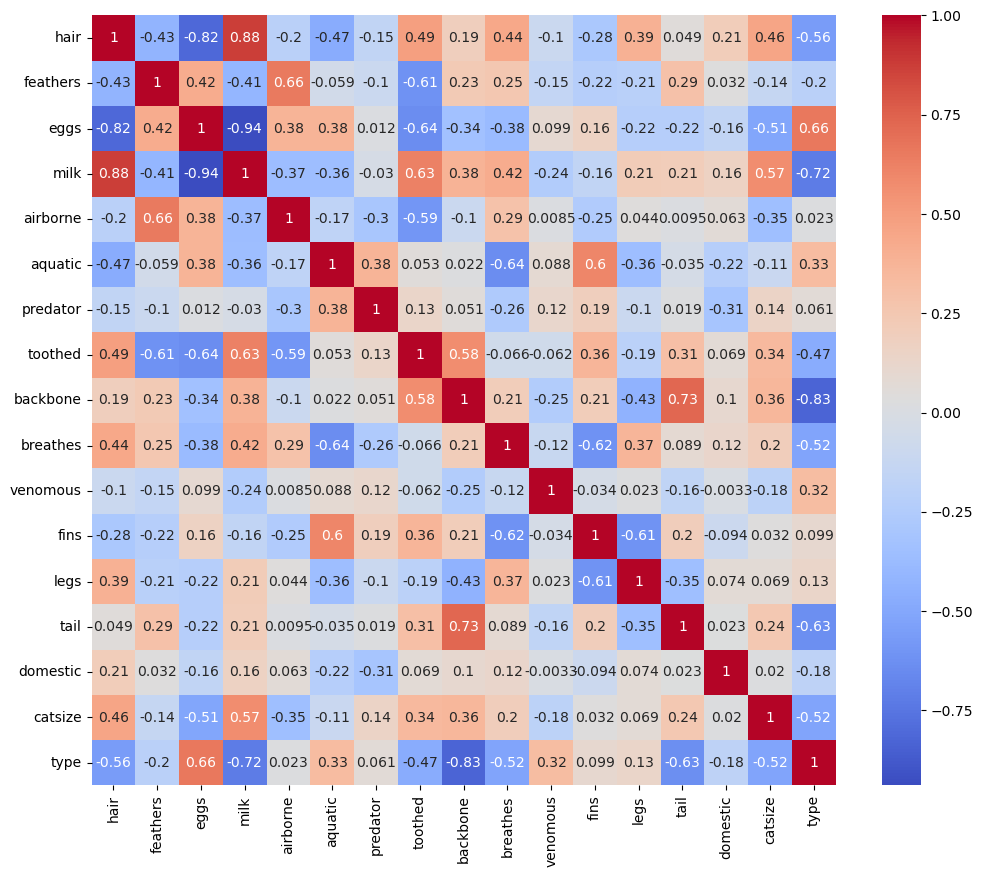

In [27]:
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.show()


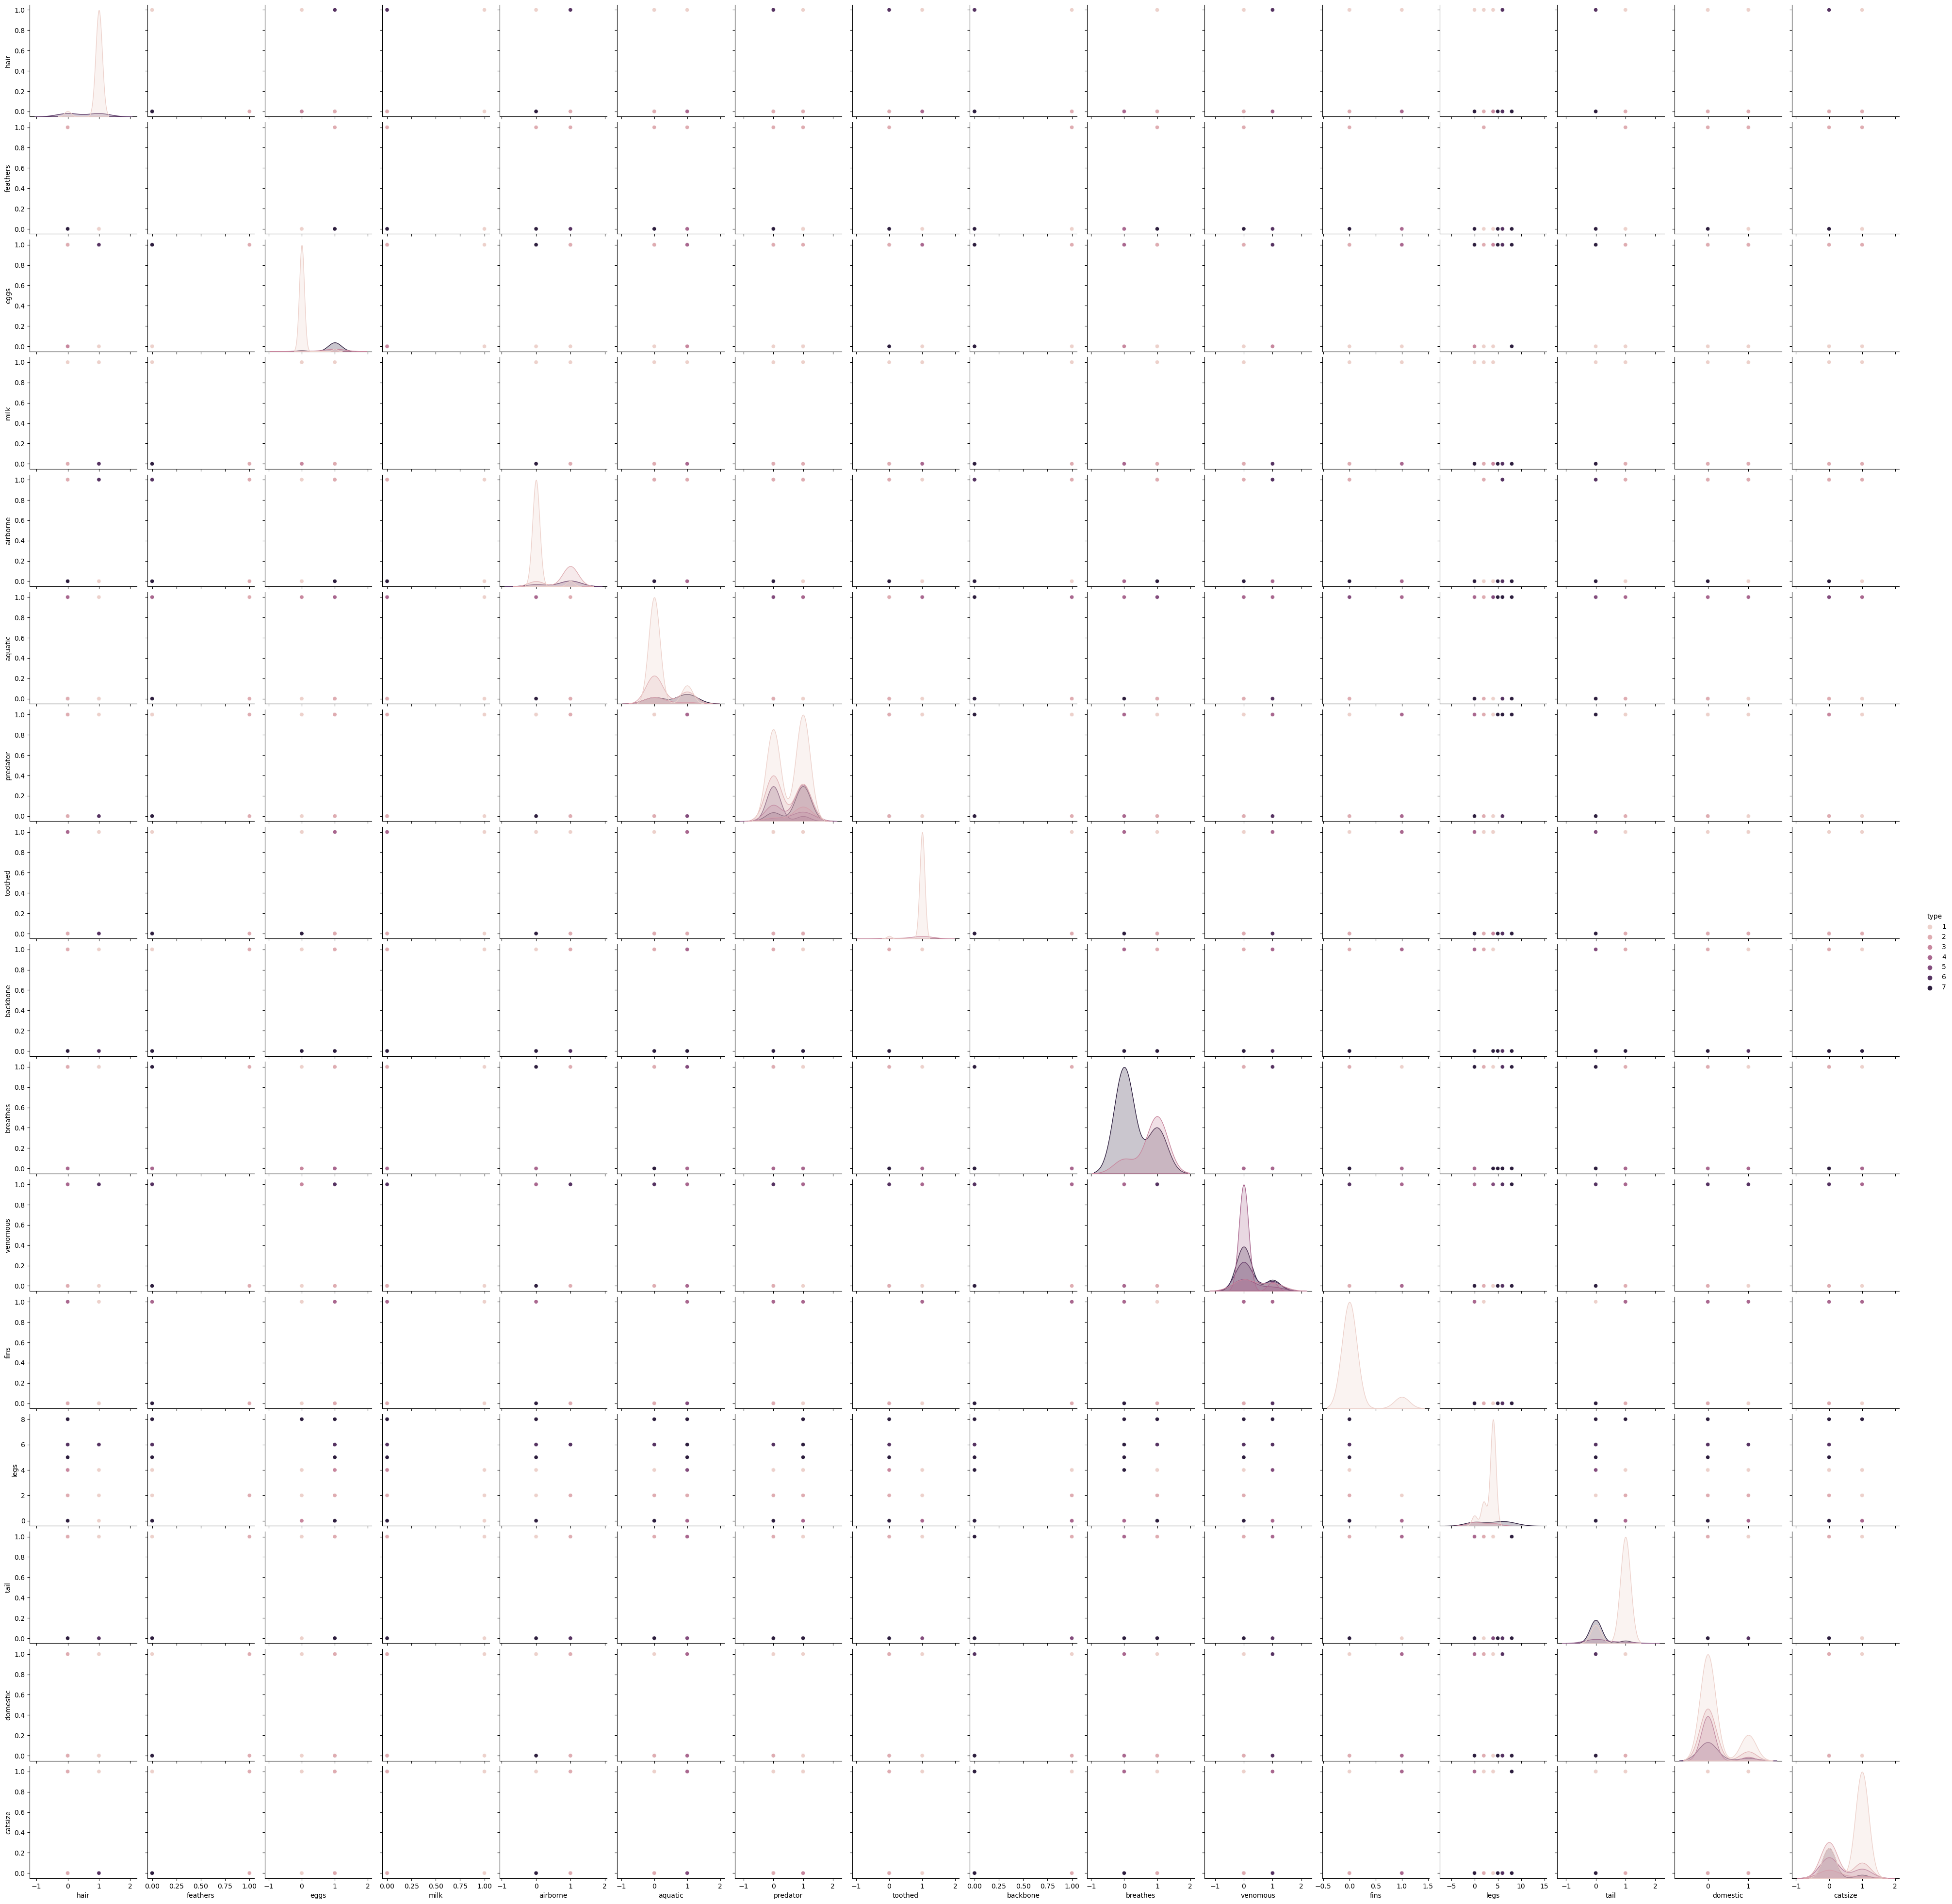

In [28]:
sns.pairplot(df, hue='type')
plt.show()

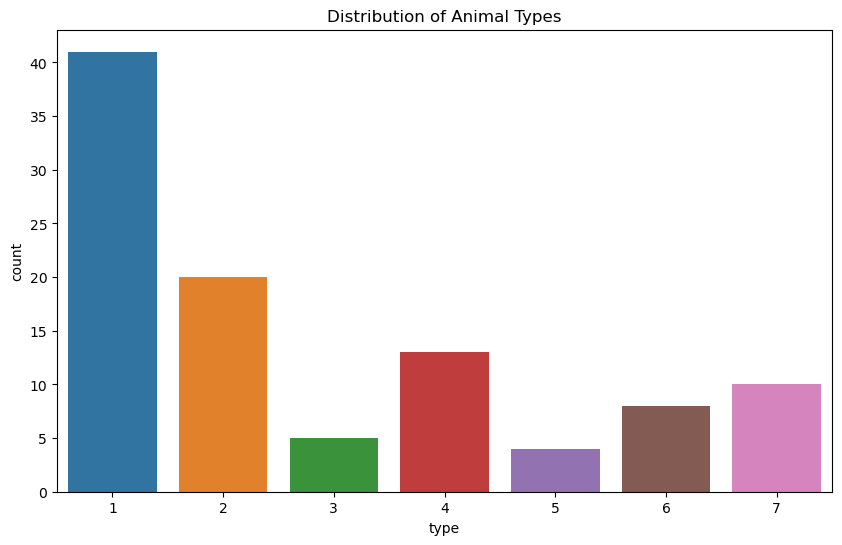

In [29]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='type')
plt.title('Distribution of Animal Types')
plt.show()

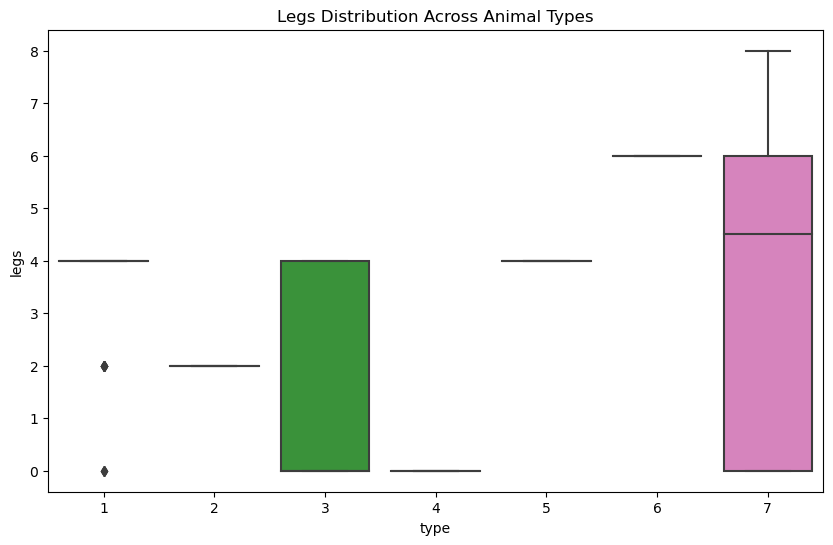

In [30]:
# Example: Visualizing the 'legs' feature across different 'type'
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='type', y='legs')
plt.title('Legs Distribution Across Animal Types')
plt.show()

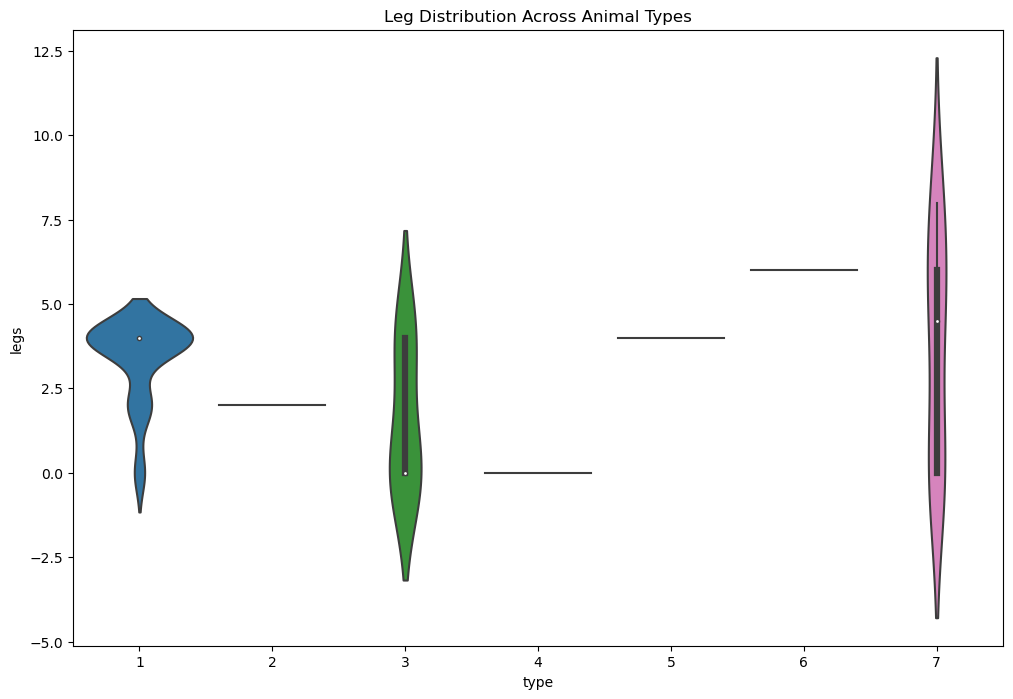

In [31]:
plt.figure(figsize=(12, 8))
sns.violinplot(data=df, x='type', y='legs')
plt.title('Leg Distribution Across Animal Types')
plt.show()